## Hypothesis testing

A hypothesis testing is a statistical method that uses sample data to evaluate a hypothesis about a population.

We have some sample data and we feel it may belong to certain population or distribution. Also, it may not belong to that population and different in some way.

So, we use hyothesis testing to solve this kind of issue. Null hypothesis states that everything is same and nothing is changed and alternative hypothesis states that something interesting is going on and has changed something. 

The hypothesis tesitng determines the null hypothesis is correct or accept alternative hypothesis. The hypothesis testing has two things :

* Population distribution
* sample distribtion

Then we need to set significance level it may belong   

## T-test

T-test is a statisitical test used to determine whether the numerical data samples differes from significantly from population or whether two samples differ from one another.

* Sample size < 30.
* We do not know the population variance.
* It follows a student t distribution.

#### One sample T-test

A  one-sample t-test checks whether a sample mean differs from the population mean. 

The basic formula for one sample T-test is given by:

$$ t = \frac{{x - \mu}}{{s/\sqrt{n}}} $$

where:

* $x$ is the sample mean.
* $\mu$ is the population mean.
* $s$ is the sample standard deviation.
* $n$ is the sample size.

Let us create some dummy customer segmentation data for the entire airline industry and a sample of customer segmentation data for Boeing company. Also, test whether the average profits of Boeing differs from rest of the companies.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(10)

# Generate data for frequent business travellers and occasional travellers
segment1_spending = stats.poisson.rvs(loc = 160, mu = 600, size = 150000)
segment2_spending = stats.poisson.rvs(loc = 160, mu = 200, size = 100000)
population_segment_spending = np.concatenate((segment1_spending, segment2_spending)) 

boeing_high_spending = stats.poisson.rvs(loc = 160, mu = 500, size = 35)
boeing_occasional_spending = stats.poisson.rvs(loc = 160, mu = 200, size = 20)
boeing_spending = np.concatenate((boeing_high_spending, boeing_occasional_spending))

print(population_segment_spending.mean()) 
print(boeing_spending.mean())

600.014032
547.8545454545455


We have combined slightly different values in boeing spending, so let's find out if t-test finds two means are different

In [3]:
stats.ttest_1samp(a = boeing_spending,
                  popmean = population_segment_spending.mean())

TtestResult(statistic=-2.5948683520204314, pvalue=0.012158765213083872, df=54)

The test t-statistics = -2.595 tells us that the sample mean deviates -2.595 times from the population mean or null hypothesis. If t-statistics lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

In [4]:
# Lower quantile (df = N-1)
lower_quantile = stats.t.ppf(q = 0.025, df = 54) 
print("Lower quantile", lower_quantile)

# Upper quantile
upper_quantile = stats.t.ppf(q = 0.975, df = 54)
print("Upper quantile", upper_quantile)

Lower quantile -2.0048792865665233
Upper quantile 2.004879286566523


Since, we have got the t-statistic value of -2.595 < -2.00. Hence, we conclude to accept the alternative hypotheis

We can calculate the chances of seeing a result as extreme as the one we have obsereved (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function.

In [5]:
stats.t.cdf(x = -2.595,  # T-test statistic
            df = 54) * 2  # Multiply two for two-tailed test 

0.012154636092455718

Note : Tha above value is same as p-value listed in the original t-test output. It indicates the chance of our sample if null hypothesis is true is about 1.2%. 

In this case, the p-value is lower than the significance level alpha (1 - conf.level), so we should reject the null hypothesis.

The above sentence also mean if we were to construct a 95% confidence interval for the sample, it would not capture the population mean of 600.

In [7]:
# Calculating the 95% confidence interval

sigma = boeing_spending.std() / math.sqrt(55)  # Sample stdev / sample size

stats.t.interval(confidence= 0.95,
                 df = 54,
                 loc = boeing_spending.mean(),
                 scale = sigma)

(507.9224829314841, 587.7866079776069)

On the other hand, because we have 1.2% chance of seeing a result due to chance, it is not significant if the confidence interval is 99%, let us see the proof below

In [8]:
# Calcualting for the 99% confidence interval

stats.t.interval(confidence = 0.99,
                 df = 54,
                 loc = boeing_spending.mean(),
                 scale = sigma)

(494.6752839831485, 601.0338069259424)

## Two-sample T-test

A two-sample t-test investigates whether the two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both samples are same. 

The one-sample t-test was used to compare sample mean with a known population parameter, But, in two-sample t-test , we test by passing the stats.ttend_ind() function

In [35]:
np.random.seed(10)
american_air_spending_high= stats.poisson.rvs(loc= 100, mu = 150, size = 35)
american_air_spending_low = stats.poisson.rvs(loc = 100, mu = 220, size = 20)
american_airlines_spending = np.concatenate((american_air_spending_high, american_air_spending_low))

print(american_airlines_spending.mean())

273.1636363636364


In [36]:
stats.ttest_ind(a = boeing_spending,
                b = american_airlines_spending,
                equal_var = False)  # Assumes samples have equal variance

TtestResult(statistic=13.322374726547809, pvalue=1.586344304642062e-19, df=59.61995192545434)

The test yields a p-value of $1.5 \times 10^{-19}$, which means there the p-value is extreme low compared to 95% confidence interval of 0.05. Hence, we reject the null hypothesis. 

## Paired T-test

This t-test is used to test the samples in the same group. For example, the company changed the UI design and want to check if users spent more time to buy on the website. A paired t-test lets you check whether the means of the samples from the same groups differ or not. 

In [53]:
np.random.seed(11)
before_ui = stats.norm.rvs(scale = 30, loc = 125, size = 100)
after_ui = before_ui + stats.norm.rvs(scale = 5, loc = +50, size = 100)

time_df = pd.DataFrame({"time_before" : before_ui,
                          "time_after" : after_ui,
                          "time_change" : after_ui - before_ui})

time_df.head(5)

,time_before,time_after,time_change
0,177.483642,231.855006,54.371364
1,116.417810,166.776071,50.358261
2,110.463046,152.267788,41.804742
3,45.400443,92.163930,46.763487
4,124.751461,178.840309,54.088848


In [54]:
time_df.describe()

,time_before,time_after,time_change
count,100.000000,100.000000,100.000000
mean,125.345546,175.365171,50.019625
std,28.132539,28.422183,4.783696
min,45.400443,92.163930,39.754714
25%,105.421042,155.398236,47.203789
50%,125.830805,177.384089,49.836537
75%,145.637145,195.177258,52.988673
max,189.700233,242.970357,61.009282


In [55]:
stats.ttest_rel(a = before_ui,
                b = after_ui)

TtestResult(statistic=-104.56271885992558, pvalue=3.7739409252142857e-103, df=99)

The summary shows that the p-value is extremely small. Hence, we reject the null hypothesis and also we can see that the users have spent 50 seconds more in the website and it confirms that the new UI design work better than the previous one.

### Type 1 and Type 2 error

Type 1 error :
Type 1 error occurs when you incorrectly reject the null hypothesis(H0) when it is actually true.

Type 2 error :
Type 2 error occurs when you fail to reject the null hypotheis(H0) wen the alternative hypotheis(H1) is true.

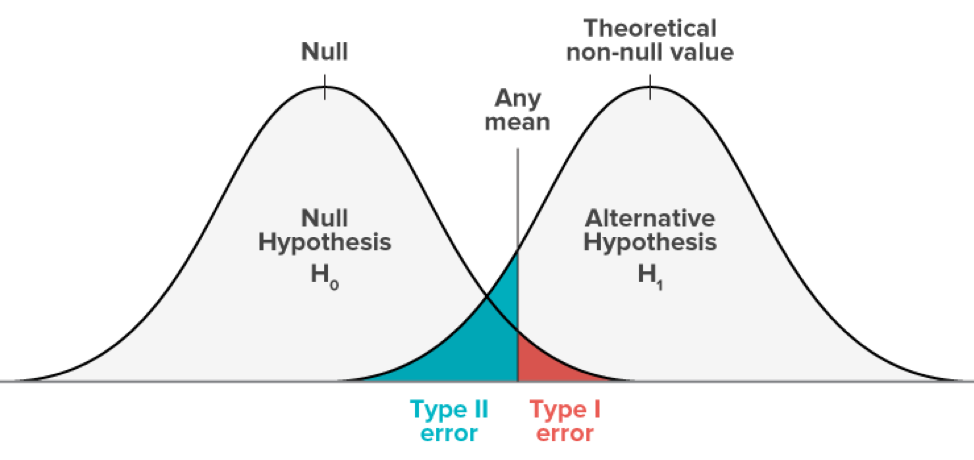



* Type 1 error is considered to be more worse or dangerous than type 2 because to reject what is true is more harmful thatn keeping the data which is not.
* The maximum probability of type 1 error is called significance level alpha ($\alpha$). Since, $\alpha$ is probability, it only takes the value between  0 and 1. 
* We wish to reduce $\alpha$ but when $\alpha$ is reduced too much, the type 2 error increases.

### Note :
Some trends usually observed in the Type 1 and Type 2 error function.
* Power is the area under the alternative hypothesis except type 2 error.
* n is sample size
* s is standard deviation 
* $\delta$ is mena of alternative hypothesis

1. If s increases, there is more overlap and Power decreases.
2. If n increases, there is less overlap and power increases.
3. if $\delta$ increases, the curve shft towards right and power increases.